# Project: Grading System
In this project, a dataset containing randomly selected student names, grade levels, and scores from various tests is used. A weighted total grade is calculated, and corresponding letter grades are assigned. Additionally, grade analysis is performed using the prepared data.

In [19]:
import string
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
lower_case_letters = string.ascii_lowercase
upper_case_letters = string.ascii_uppercase
digits = string.digits
punctuations = string.punctuation

In [21]:
# number of students
number_students = 100

### Names

Generate a list of names using random characters with lengths of 3, 4, 5, or 6 characters.

In [24]:
random.seed(0)

names = []
for i in range(number_students):
    length_name = random.choice(range(3,7))
    name = ''
    for i in range(length_name):
        name += random.choice(lower_case_letters)
    names.append(name.capitalize())

names[:5]

['Ynbiqp', 'Zjplsg', 'Jeyd', 'Rwzte', 'Dxcvk']

## Grades

Generate a list of randomly assigned grade levels for each student.

In [27]:
random.seed(0)
grade_list = [9,10,11,12]
grades = [random.choice(grade_list)  for i in range(number_students)]
grades[:10]

[12, 12, 9, 11, 12, 12, 11, 12, 11, 10]

## Test Scores

Generate lists of randomly assigned grades for each student across five exams: Test1, Test2, Test3, Test4, and Final.

- Test grades are randomly chosen from a normal (Gaussian) distribution with a specified mean (mu) and standard deviation (sigma).

In [30]:
random.gauss(mu=70, sigma=5)

72.15905718422292

In [31]:
random.seed(0)
test1 = [int(random.gauss(mu=80, sigma=15))  for i in range(number_students) ]
test2 = [int(random.gauss(mu=75, sigma=15))  for i in range(number_students) ]
test3 = [int(random.gauss(mu=80, sigma=10))  for i in range(number_students) ]
test4 = [int(random.gauss(mu=70, sigma=20))  for i in range(number_students) ]
final = [int(random.gauss(mu=70, sigma=20))  for i in range(number_students) ]

In [41]:
exam_list = [test1, test2, test3, test4, final]
exam_names = ['test1', 'test2', 'test3', 'test4', 'final']

To generate the exam names, the globals() dictionary, which contains all global variable name-value pairs, can be used instead of manually specifying each test name, as shown in the code above.

In [47]:
type(globals())

dict

In [43]:
globals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', 'json', 'getpass', 'hashlib', 'import_pandas_safely', '__pandas', 'is_data_frame', 'dataframe_columns', 'dtypes_str', 'dataframe_hash', 'get_dataframes', '_1', '_i2', '_2', '_i3', '_3', '_i4', '_4', '_i5', '_5', '_i6', '_6', '_i7', '_7', '_i8', '_8', '_i9', '_9', '_i10', '_10', '_i11', '_11', '_i12', '_i13', '_13', '_i14', '_i15', '_15', '_i16', '_i17', '_17', '_i18', '_18', '_i19', 'string', 'random', 'sns', 'plt', 'np', '_i20', 'lower_case_letters', 'upper_case_letters', 'digits', 'punctuations', '_i21', 'number_students', '_i22', '_22', '_i23', '_23', '_i24', 'names', 'i', 'length_name', 'name', '_24', '_i25', '_25', '_i26', '_26', '_i27', 'grade_list', 'grades', '_27', '_i28', '_28', '_i29', '_29', '_i30', '_30', '_i31', 'test1', 'test2', 'test3'

In [45]:
exam_names = []
for exam in exam_list:
    exam_names.append([name for name in globals() if globals()[name] == exam][0])
exam_names

['test1', 'test2', 'test3', 'test4', 'final']

Let's award extra points to higher grade levels, as they are expected to have more knowledge compared to lower grade levels.

In [60]:
for exam in exam_list:
    for i in range(number_students):
        exam[i] += (grades[i] - 9)*3

In [62]:
for exam in exam_list:
    print(f'Exam: {[name for name in globals() if globals()[name] == exam][0]}    Maximum: {max(exam):<5}   Minimum: {min(exam):<5}')

Exam: test1    Maximum: 109     Minimum: 50   
Exam: test2    Maximum: 109     Minimum: 40   
Exam: test3    Maximum: 109     Minimum: 62   
Exam: test4    Maximum: 109     Minimum: 29   
Exam: final    Maximum: 109     Minimum: 27   


Since some of the grades exceed 100, we will cap them at 100.

In [65]:
for exam in exam_list:
    for score in exam:
        if score > 100:
            exam.insert(exam.index(score), 100)
            exam.remove(score)        
        if score < 0:
            exam.insert(exam.index(score), 0)
            exam.remove(score)

Let's check the maximum and minimum grades.

In [67]:
for exam in exam_list:
    print(f'Exam: {[name for name in globals() if globals()[name] == exam][0]}    Maximum: {max(exam):<5}   Minimum: {min(exam):<5}')

Exam: test1    Maximum: 100     Minimum: 50   
Exam: test2    Maximum: 100     Minimum: 40   
Exam: test3    Maximum: 100     Minimum: 62   
Exam: test4    Maximum: 100     Minimum: 29   
Exam: final    Maximum: 100     Minimum: 27   


### Weighted Score

The weighted total grade is calculated using the following weights: 
- 15% each for Test 1, Test 2, Test 3, and Test 4, and 40% for the Final exam.

In [74]:
weighted_scores = [ 0.15*(test1[i]+test2[i]+test3[i]+test4[i])+0.40*final[i] for i in range(number_students)]

### Final Letter Grades

Final letters are determined usuing the following scale:

|Weighted Score|Letter Grade|
| :- | :-: |
|weighted_scores $\ge$ 90| A |
|90 > weighted_scores $\ge$ 80| B |
|80 > weighted_scores $\ge$ 70| C |
|70 > weighted_scores $\ge$ 60| D |
|60 > weighted_scores | F |


In [77]:
letter_grades = []
for i in range(number_students):
    if weighted_scores[i] >= 90: letter_grades.append('A')
    elif weighted_scores[i] >= 80: letter_grades.append('B')
    elif weighted_scores[i] >= 70: letter_grades.append('C')
    elif weighted_scores[i] >= 60: letter_grades.append('D')
    else: letter_grades.append('F')

letter_grades[:10]

['A', 'C', 'C', 'B', 'B', 'A', 'A', 'B', 'B', 'C']

### Histogram
The histogram provides a visual representation of the distribution of the values, allowing us to observe patterns such as the concentration, spread, and frequency of data within different ranges.

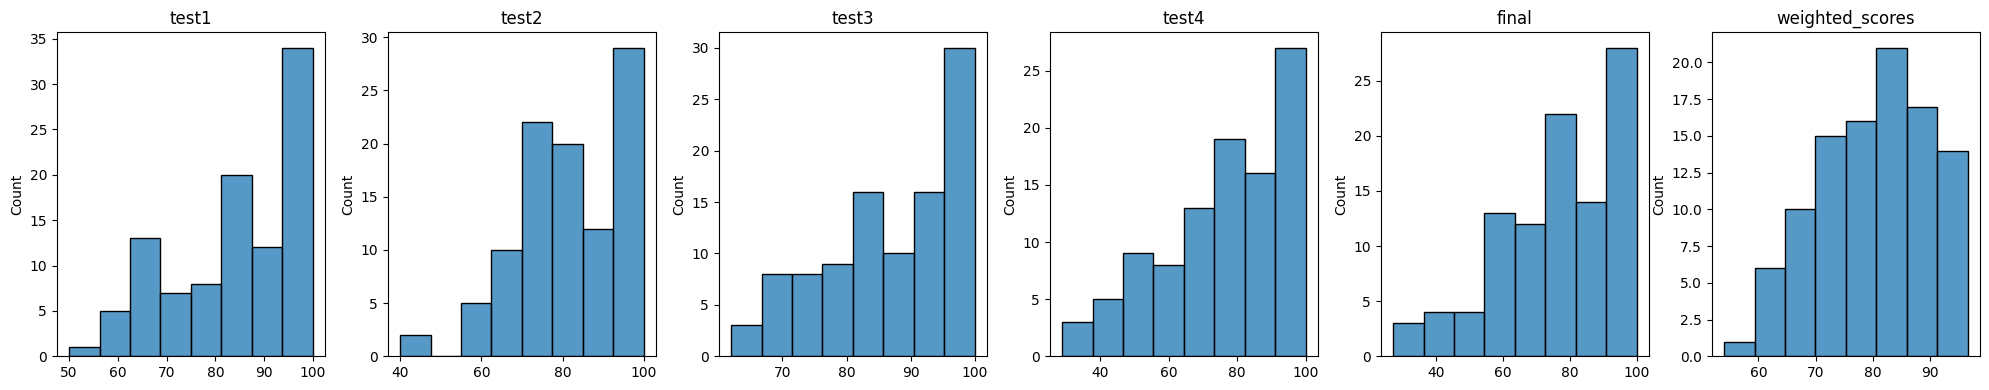

In [81]:
plt.figure(figsize=(20,4))
for i in range(1,6):
    plt.subplot(1,6,i)
    plt.title(exam_names[i-1])
    sns.histplot(exam_list[i-1])
    plt.tight_layout()
    
    
plt.subplot(1,6,6)
plt.title('weighted_scores')
sns.histplot(weighted_scores);

## Drop Lowest Test Score

The lowest test grade is dropped, and only the best three test scores are considered, each weighted at 20\%.

Create a dictionary where each name is paired with the list of the corresponding exam grades.

In [105]:
student_dict = {}
for i in range(number_students):
    student_dict[names[i]] = [test1[i], test2[i], test3[i], test4[i], final[i]]

In [107]:
for name in list(student_dict.keys())[:5]:
    print(f'{name:<7}  {student_dict[name]}')

Ynbiqp   [100, 73, 90, 100, 96]
Zjplsg   [77, 71, 100, 60, 60]
Jeyd     [69, 76, 86, 56, 82]
Rwzte    [97, 100, 100, 68, 82]
Dxcvk    [82, 100, 85, 100, 72]


Remove the lowest test grade from the list using the remove() method.

In [109]:
for i in range(number_students):
    student_dict[names[i]].remove(min(student_dict[names[i]][:-1])) 

In [111]:
for name in list(student_dict.keys())[:5]:
    print(f'{name:<7}  {student_dict[name]}')

Ynbiqp   [100, 90, 100, 96]
Zjplsg   [77, 71, 100, 60]
Jeyd     [69, 76, 86, 82]
Rwzte    [97, 100, 100, 82]
Dxcvk    [100, 85, 100, 72]


### Weighted Scores-2

In [119]:
weighted_scores_2 = []
for grade in student_dict.values():
    weighted_scores_2.append(0.20*(grade[0]+grade[1]+grade[2])+0.40*grade[3])

### Final Letter Grades-2

In [126]:
letter_grades_2 = []
for i in range(number_students):
    if weighted_scores_2[i] >= 90: letter_grades_2.append('A')
    elif weighted_scores_2[i] >= 80: letter_grades_2.append('B')
    elif weighted_scores_2[i] >= 70: letter_grades_2.append('C')
    elif weighted_scores_2[i] >= 60: letter_grades_2.append('D')
    else: letter_grades_2.append('F')

letter_grades_2[:10]

['A', 'C', 'C', 'A', 'B', 'A', 'A', 'A', 'B', 'C']

### Histogram

A comparison of histograms showing the distribution of weighted scores before and after dropping lowest test scores.

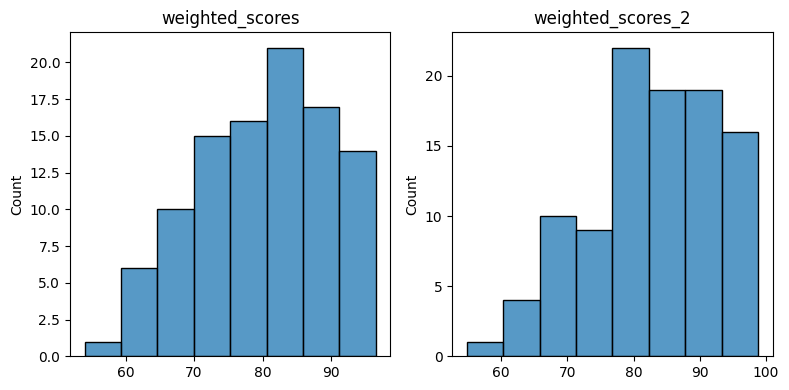

In [132]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('weighted_scores')
sns.histplot(weighted_scores)
plt.subplot(1,2,2)
plt.title('weighted_scores_2')
sns.histplot(weighted_scores_2)
plt.tight_layout();

A comparison of histograms showing the distribution of letter grades before and after dropping lowest test scores.

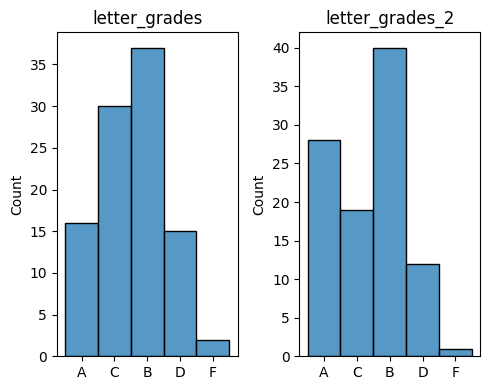

In [134]:
plt.figure(figsize=(5,4))
plt.subplot(1,2,1)
plt.title('letter_grades')
sns.histplot(letter_grades)
plt.subplot(1,2,2)
plt.title('letter_grades_2')
sns.histplot(letter_grades_2)
plt.tight_layout();

## Grade Analysis

Create a dictionary where each grade level maps to a dictionary of test grades.

In [143]:
grade_dict={i:{j:[] for j in exam_names} for i in grade_list}

for i in range(number_students):
    for j in range(len(exam_names)):
        grade_dict[grades[i]][exam_names[j]].append(exam_list[j][i])

In [153]:
grade_dict.keys()

dict_keys([9, 10, 11, 12])

In [151]:
grade_dict[9].keys()

dict_keys(['test1', 'test2', 'test3', 'test4', 'final'])

The number of students at each grade level who took the tests.

In [37]:
for grade, exam_scores in grade_dict.items():
    print(f'Grade: {grade:<2}', end=' ')
    for exam, score in  exam_scores.items():
        print(f'{exam}:{len(score)}', end=' ')
    print()

Grade: 9  test1:26 test2:26 test3:26 test4:26 final:26 
Grade: 10 test1:24 test2:24 test3:24 test4:24 final:24 
Grade: 11 test1:28 test2:28 test3:28 test4:28 final:28 
Grade: 12 test1:22 test2:22 test3:22 test4:22 final:22 


### Grade Based

For each grade level, calculate and display the mean score for each exam.

In [39]:
for grade in grade_dict:
    for exam in exam_names:
        print(f'Grade: {grade:<10} {exam} Mean: {np.mean(grade_dict[grade][exam]):.2f} ')
    print('-'*40)

Grade: 9          test1 Mean: 76.27 
Grade: 9          test2 Mean: 70.50 
Grade: 9          test3 Mean: 76.88 
Grade: 9          test4 Mean: 64.62 
Grade: 9          final Mean: 67.23 
----------------------------------------
Grade: 10         test1 Mean: 81.08 
Grade: 10         test2 Mean: 79.25 
Grade: 10         test3 Mean: 84.12 
Grade: 10         test4 Mean: 75.00 
Grade: 10         final Mean: 72.58 
----------------------------------------
Grade: 11         test1 Mean: 84.64 
Grade: 11         test2 Mean: 79.93 
Grade: 11         test3 Mean: 86.75 
Grade: 11         test4 Mean: 74.39 
Grade: 11         final Mean: 81.25 
----------------------------------------
Grade: 12         test1 Mean: 82.55 
Grade: 12         test2 Mean: 84.32 
Grade: 12         test3 Mean: 85.95 
Grade: 12         test4 Mean: 79.36 
Grade: 12         final Mean: 70.64 
----------------------------------------


Create a bar plot showing the mean scores of all exams for each grade level.

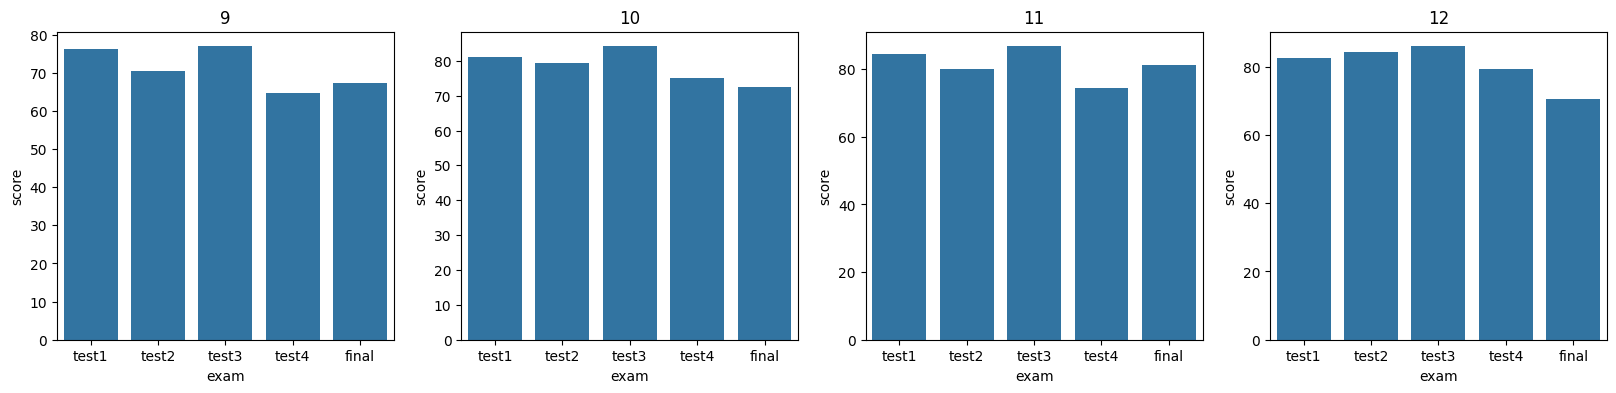

In [40]:
plt.figure(figsize=(20,4))
k = 1
for grade in grade_list:
    plt.subplot(1,4,k)
    sns.barplot(x=exam_names, y=[np.mean(grade_dict[grade][exam]) for exam in exam_names])
    plt.title(grade)
    plt.xlabel('exam')
    plt.ylabel('score')
    k += 1

### Exam Based

For each exam, calculate and display the mean score for each grade level.

In [42]:
for exam in exam_names:
    for grade in grade_dict:
        print(f'Grade: {grade:<5} {exam} Mean: {np.mean(grade_dict[grade][exam]):.2f} ')
    print('-'*40)

Grade: 9     test1 Mean: 76.27 
Grade: 10    test1 Mean: 81.08 
Grade: 11    test1 Mean: 84.64 
Grade: 12    test1 Mean: 82.55 
----------------------------------------
Grade: 9     test2 Mean: 70.50 
Grade: 10    test2 Mean: 79.25 
Grade: 11    test2 Mean: 79.93 
Grade: 12    test2 Mean: 84.32 
----------------------------------------
Grade: 9     test3 Mean: 76.88 
Grade: 10    test3 Mean: 84.12 
Grade: 11    test3 Mean: 86.75 
Grade: 12    test3 Mean: 85.95 
----------------------------------------
Grade: 9     test4 Mean: 64.62 
Grade: 10    test4 Mean: 75.00 
Grade: 11    test4 Mean: 74.39 
Grade: 12    test4 Mean: 79.36 
----------------------------------------
Grade: 9     final Mean: 67.23 
Grade: 10    final Mean: 72.58 
Grade: 11    final Mean: 81.25 
Grade: 12    final Mean: 70.64 
----------------------------------------


Create a bar plot showing the mean scores of each exam for each grade level.

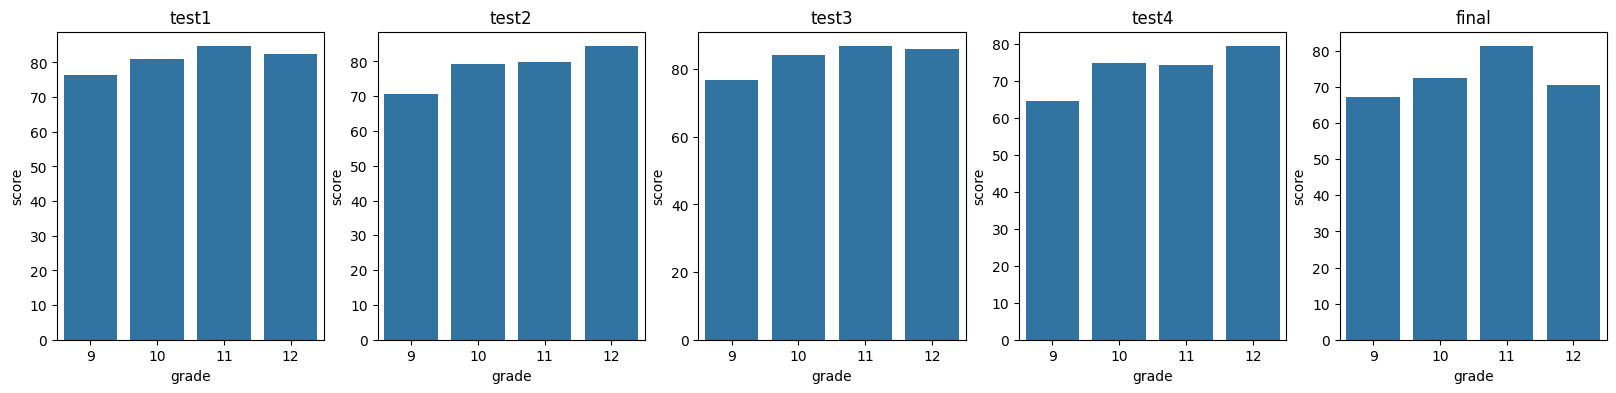

In [43]:
plt.figure(figsize=(20,4))
k = 1
for exam in exam_names:
    plt.subplot(1,5,k)
    sns.barplot(x=grade_list, y=[np.mean(grade_dict[grade][exam]) for grade in grade_list])
    plt.title(exam)
    plt.xlabel('grade')
    plt.ylabel('score')
    k += 1

## Future Work

Use different distributions to randomly generate exam grades, ensuring that the distributions vary for different grade levels. Additionally, employ various visualization tools to analyze the data.
